<a href="https://colab.research.google.com/github/megadeazzahra/decision-tree/blob/main/decision_tree_wine_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as _matplotlib
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, roc_curve, auc
from sklearn.inspection import permutation_importance

# Load Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/data mining/winequality-red.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# EDA

In [4]:
df.shape

(1599, 12)

In [5]:
df.dtypes

,0
fixed acidity,float64
volatile acidity,float64
citric acid,float64
residual sugar,float64
chlorides,float64
free sulfur dioxide,float64
total sulfur dioxide,float64
density,float64
pH,float64
sulphates,float64


In [6]:
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [7]:
# menampilkan semua nilai unik (tanpa duplikat) dalam kolom quality
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

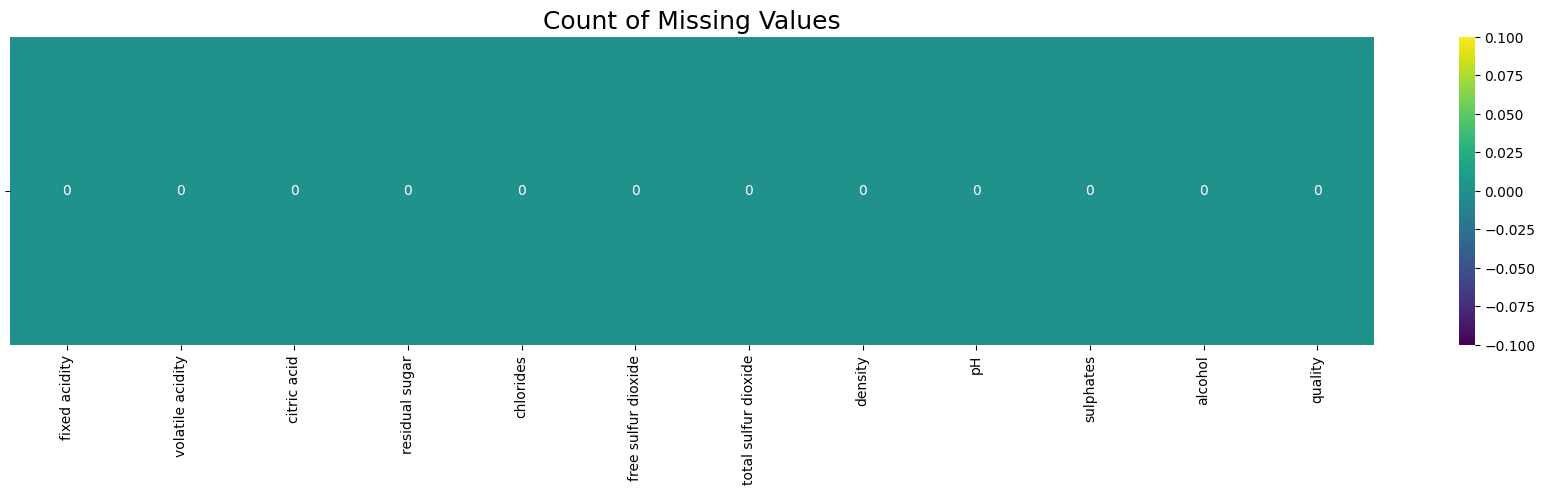

In [8]:
# Mengatur ukuran gambar menjadi lebar 22 dan tinggi 4
plt.figure(figsize=(22, 4))

# Membuat heatmap untuk menampilkan jumlah nilai yang hilang (missing values) di setiap kolom dalam DataFrame
sns.heatmap(
    (df.isna().sum()).to_frame(name='').T,  # Menghitung jumlah nilai NaN dan mengubahnya menjadi DataFrame untuk heatmap
    cmap='viridis',  # Menggunakan palet warna 'viridis' untuk heatmap
    annot=True,      # Menampilkan jumlah nilai yang hilang sebagai anotasi
    fmt='0.0f'       # Format angka tanpa desimal
).set_title('Count of Missing Values', fontsize=18)  # Menambahkan judul heatmap

# Menampilkan plot
plt.show()


In [64]:
# Menghasilkan statistik deskriptif untuk setiap kolom dalam DataFrame dan mentransposenya
df.describe().T.style.background_gradient(cmap='PuRd', axis=1)


,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.000000,8.319637,1.741096,4.600000,7.100000,7.900000,9.200000,15.900000
volatile acidity,1599.000000,0.527821,0.179060,0.120000,0.390000,0.520000,0.640000,1.580000
citric acid,1599.000000,0.270976,0.194801,0.000000,0.090000,0.260000,0.420000,1.000000
residual sugar,1599.000000,2.538806,1.409928,0.900000,1.900000,2.200000,2.600000,15.500000
chlorides,1599.000000,0.087467,0.047065,0.012000,0.070000,0.079000,0.090000,0.611000
free sulfur dioxide,1599.000000,15.874922,10.460157,1.000000,7.000000,14.000000,21.000000,72.000000
total sulfur dioxide,1599.000000,46.467792,32.895324,6.000000,22.000000,38.000000,62.000000,289.000000
density,1599.000000,0.996747,0.001887,0.990070,0.995600,0.996750,0.997835,1.003690
pH,1599.000000,3.311113,0.154386,2.740000,3.210000,3.310000,3.400000,4.010000
sulphates,1599.000000,0.658149,0.169507,0.330000,0.550000,0.620000,0.730000,2.000000


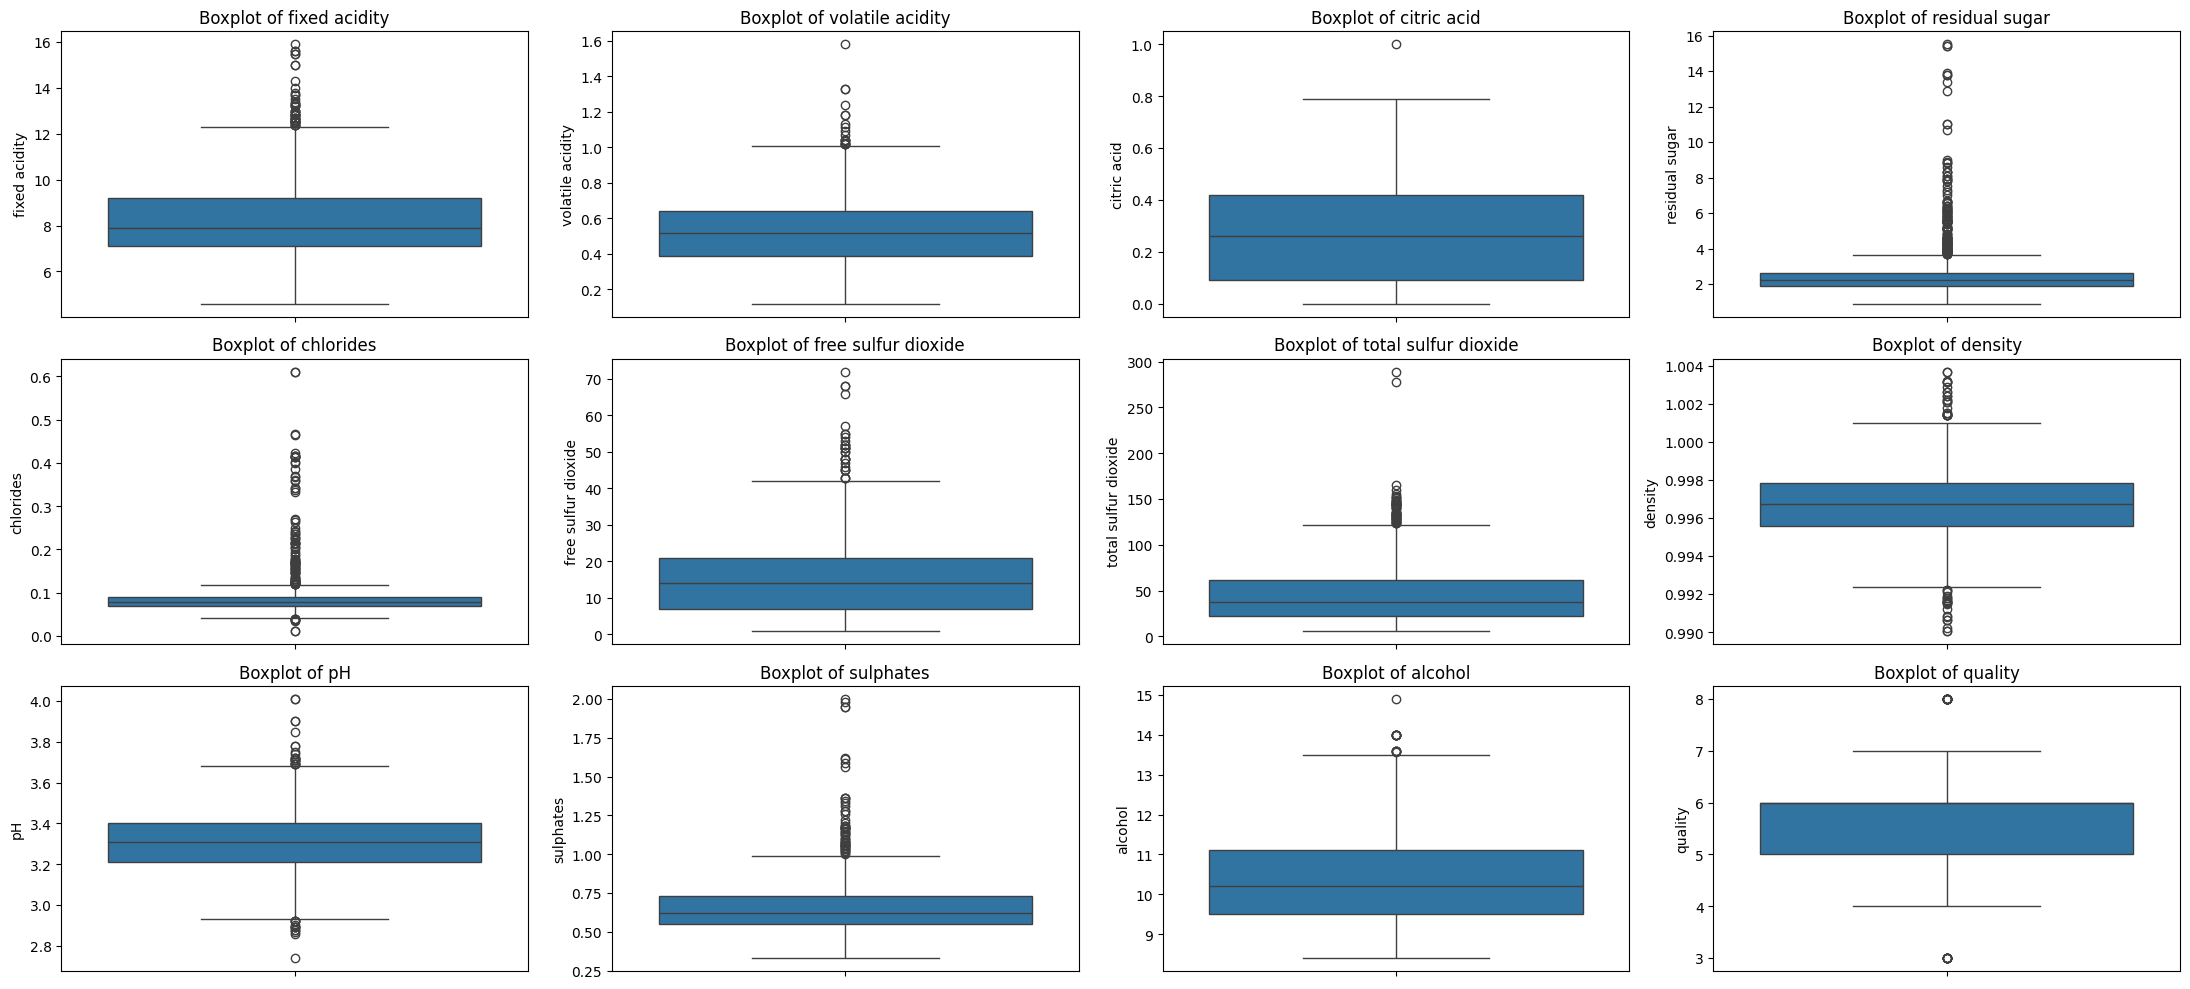

In [37]:
#menampilkan boxplot

# Menentukan jumlah baris dan kolom untuk grid plot
rows, cols = 3, 4

# Membuat grid subplots dengan 3 baris dan 4 kolom, ukuran gambar 22x10 inci
fig, axes = plt.subplots(rows, cols, figsize=(22, 10))

# Loop untuk membuat boxplot untuk setiap kolom dalam DataFrame
for ind, column in enumerate(df):
    # Menentukan posisi baris dan kolom untuk setiap boxplot
    row = ind // cols
    col = ind % cols

    # Membuat boxplot untuk setiap kolom
    sns.boxplot(df[column], orient='v', ax=axes[row, col])

    # Menambahkan judul untuk setiap boxplot
    axes[row, col].set_title(f'Boxplot of {column}')

# Menyusun layout agar plot tidak saling tumpang tindih
fig.tight_layout()


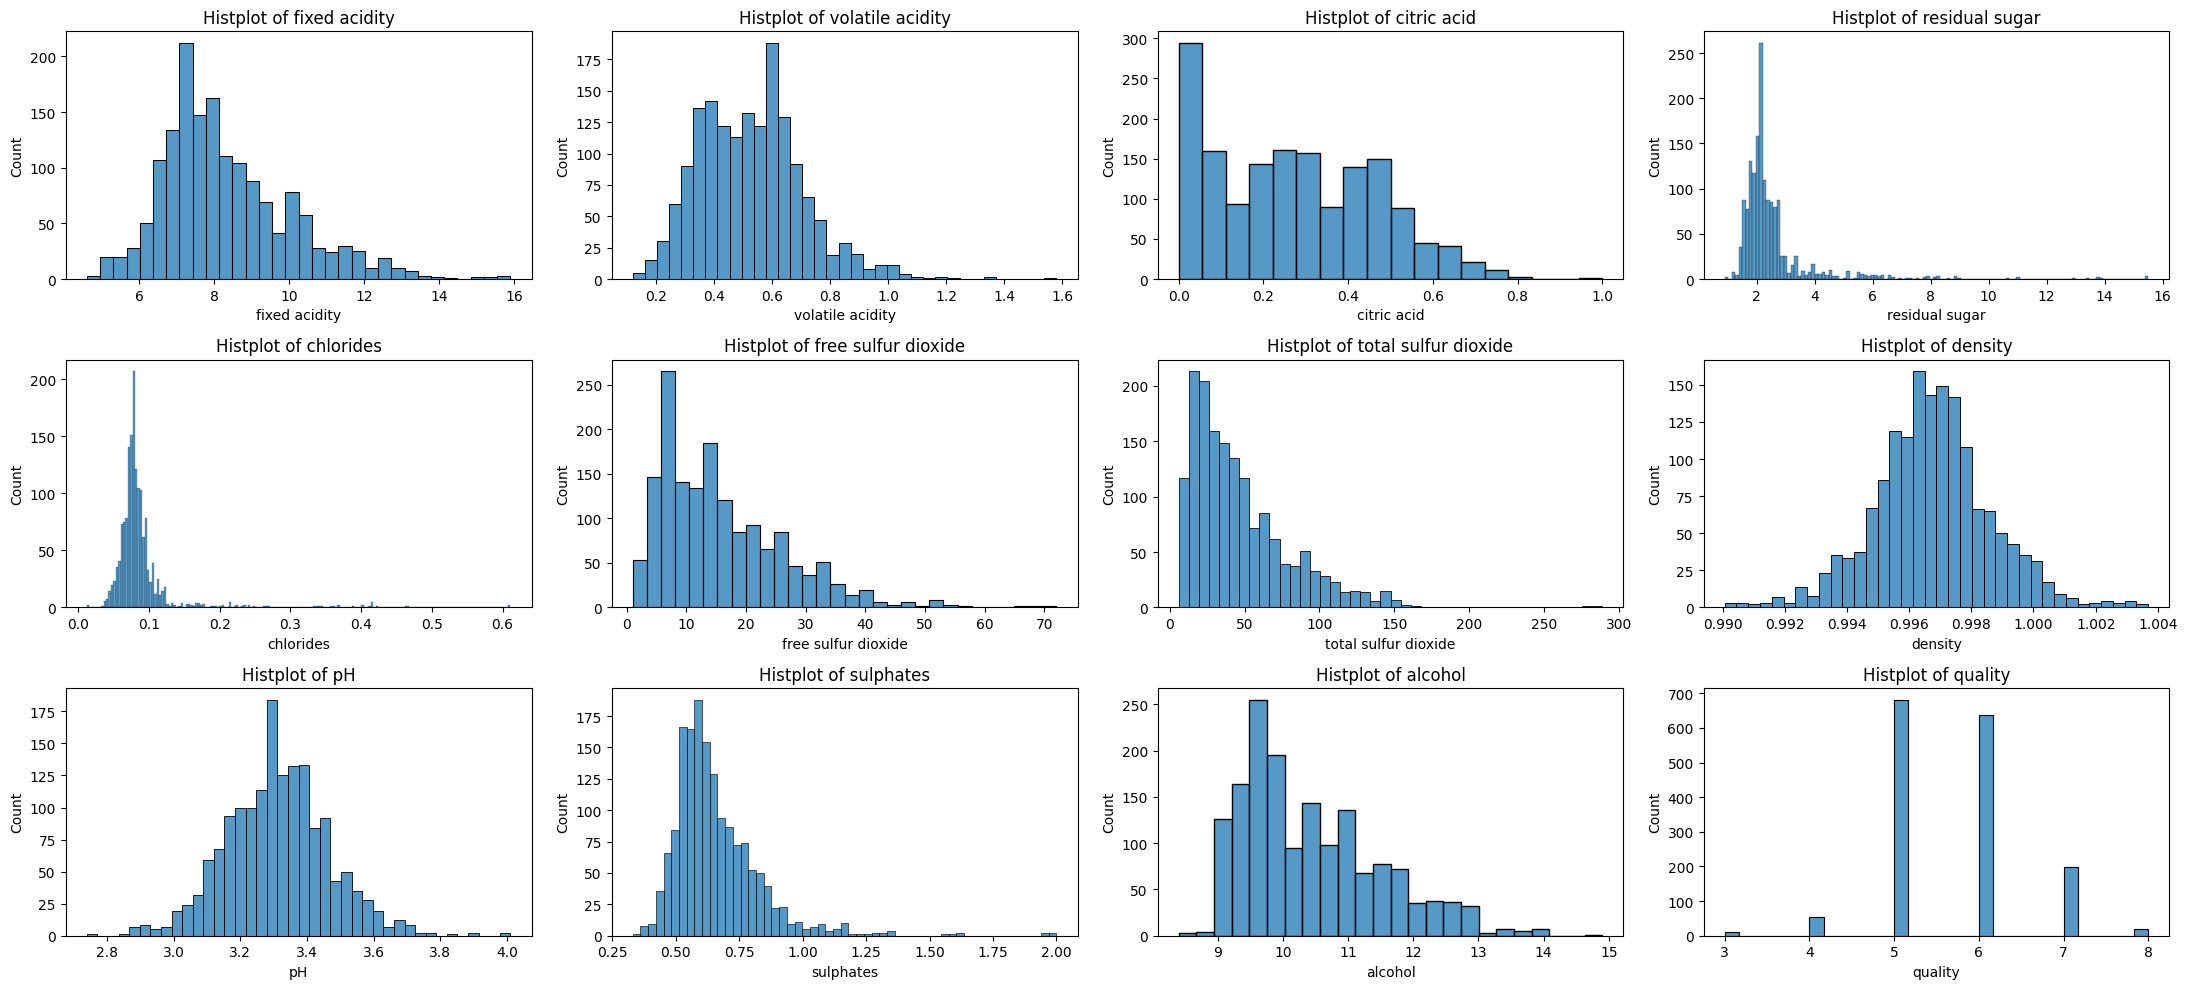

In [38]:
# menampilkan distribusi frekuensi dari setiap kolom
rows, cols = 3, 4

fig, axes = plt.subplots(rows, cols, figsize=(22,10))

for ind, column in enumerate(df):
    row = ind//cols
    col = ind%cols
    sns.histplot(df, x=column, ax=axes[row, col])
    axes[row, col].set_title(f'Histplot of {column}')

fig.tight_layout()

There's no need to filter out outliers as they are just anomalous values.

In [10]:
# Mencari jumlah nilai unik untuk setiap kolom dalam DataFrame
df.apply(lambda x: len(x.unique()))


,0
fixed acidity,96
volatile acidity,143
citric acid,80
residual sugar,91
chlorides,153
free sulfur dioxide,60
total sulfur dioxide,144
density,436
pH,89
sulphates,96


In [11]:
#menampilkan informasi tentang jumlah nilai unik dan daftar nilai-nilai unik di setiap kolom
unique = df.nunique().sort_values()

unique_values = df.apply(lambda x: x.unique())

pd.DataFrame({'Number of Unique Values': unique, 'Unique Values': unique_values})

,Number of Unique Values,Unique Values
alcohol,65,"[9.4, 9.8, 10.0, 9.5, 10.5, 9.2, 9.9, 9.1, 9.3..."
chlorides,153,"[0.076, 0.098, 0.092, 0.075, 0.069, 0.065, 0.0..."
citric acid,80,"[0.0, 0.04, 0.56, 0.06, 0.02, 0.36, 0.08, 0.29..."
density,436,"[0.9978, 0.9968, 0.997, 0.998, 0.9964, 0.9946,..."
fixed acidity,96,"[7.4, 7.8, 11.2, 7.9, 7.3, 7.5, 6.7, 5.6, 8.9,..."
free sulfur dioxide,60,"[11.0, 25.0, 15.0, 17.0, 13.0, 9.0, 16.0, 52.0..."
pH,89,"[3.51, 3.2, 3.26, 3.16, 3.3, 3.39, 3.36, 3.35,..."
quality,6,"[5, 6, 7, 4, 8, 3]"
residual sugar,91,"[1.9, 2.6, 2.3, 1.8, 1.6, 1.2, 2.0, 6.1, 3.8, ..."
sulphates,96,"[0.56, 0.68, 0.65, 0.58, 0.46, 0.47, 0.57, 0.8..."


Text(0.5, 1.0, 'Distribusi Kualitas')

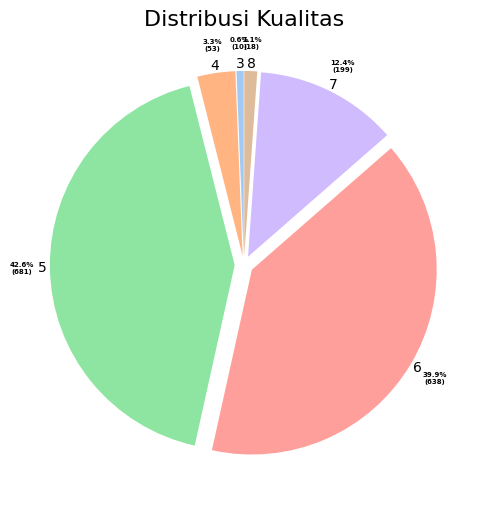

In [65]:
# Fungsi untuk menempatkan label di luar diagram pai
def autopct_outside(pct, values):
    total = sum(values)
    val = int(round(pct * total / 100.0))
    return f'{pct:.1f}%\n({val})'

plt.figure(figsize=(16, 6))

# Plot pertama - Diagram pai
plt.subplot(1, 2, 1)
# Mengasumsikan 'df' berisi dataset, ganti 'data' dengan 'df'
quality_counts = df['quality'].value_counts().sort_index()
explode = [0.05] * len(quality_counts)  # Sedikit pemisahan untuk semua irisan
wedges, texts, autotexts = plt.pie(
    quality_counts,
    labels=quality_counts.index,
    colors=sns.color_palette('pastel', len(quality_counts)),
    autopct=lambda pct: autopct_outside(pct, quality_counts),
    startangle=90,
    explode=explode,
    pctdistance=1.15,  # Menyesuaikan posisi label persentase
    labeldistance=1.04  # Menyesuaikan posisi label
)

# Menyesuaikan posisi label
for text in texts:
    text.set_horizontalalignment('center')
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(5)
    autotext.set_weight('bold')

plt.title('Distribusi Quality', fontsize=16)

Plot ini adalah diagram pai yang mewakili distribusi variabel quality dalam dataset.

<ipython-input-45-70b3bf0a9d84>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


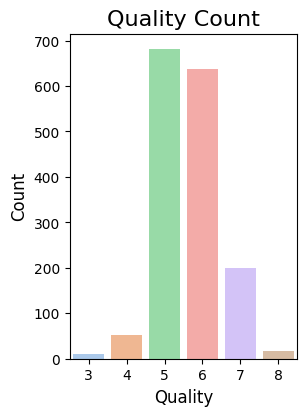

In [45]:
# Plot kedua - Diagram hitung
plt.subplot(1, 2, 2)
# Mengasumsikan 'df' berisi dataset, ganti 'data' dengan 'df'
sns.countplot(
    data=df,
    x='quality',
    palette='pastel',
)
plt.title('Quality Count', fontsize=16)
plt.xlabel('Quality', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Peningkatan tata letak umum
plt.tight_layout(pad=3.0)
plt.show()

In [58]:
# # Menghitung korelasi antar variabel numerik
df.corr(numeric_only=True).T.style.background_gradient(cmap='coolwarm', axis=1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


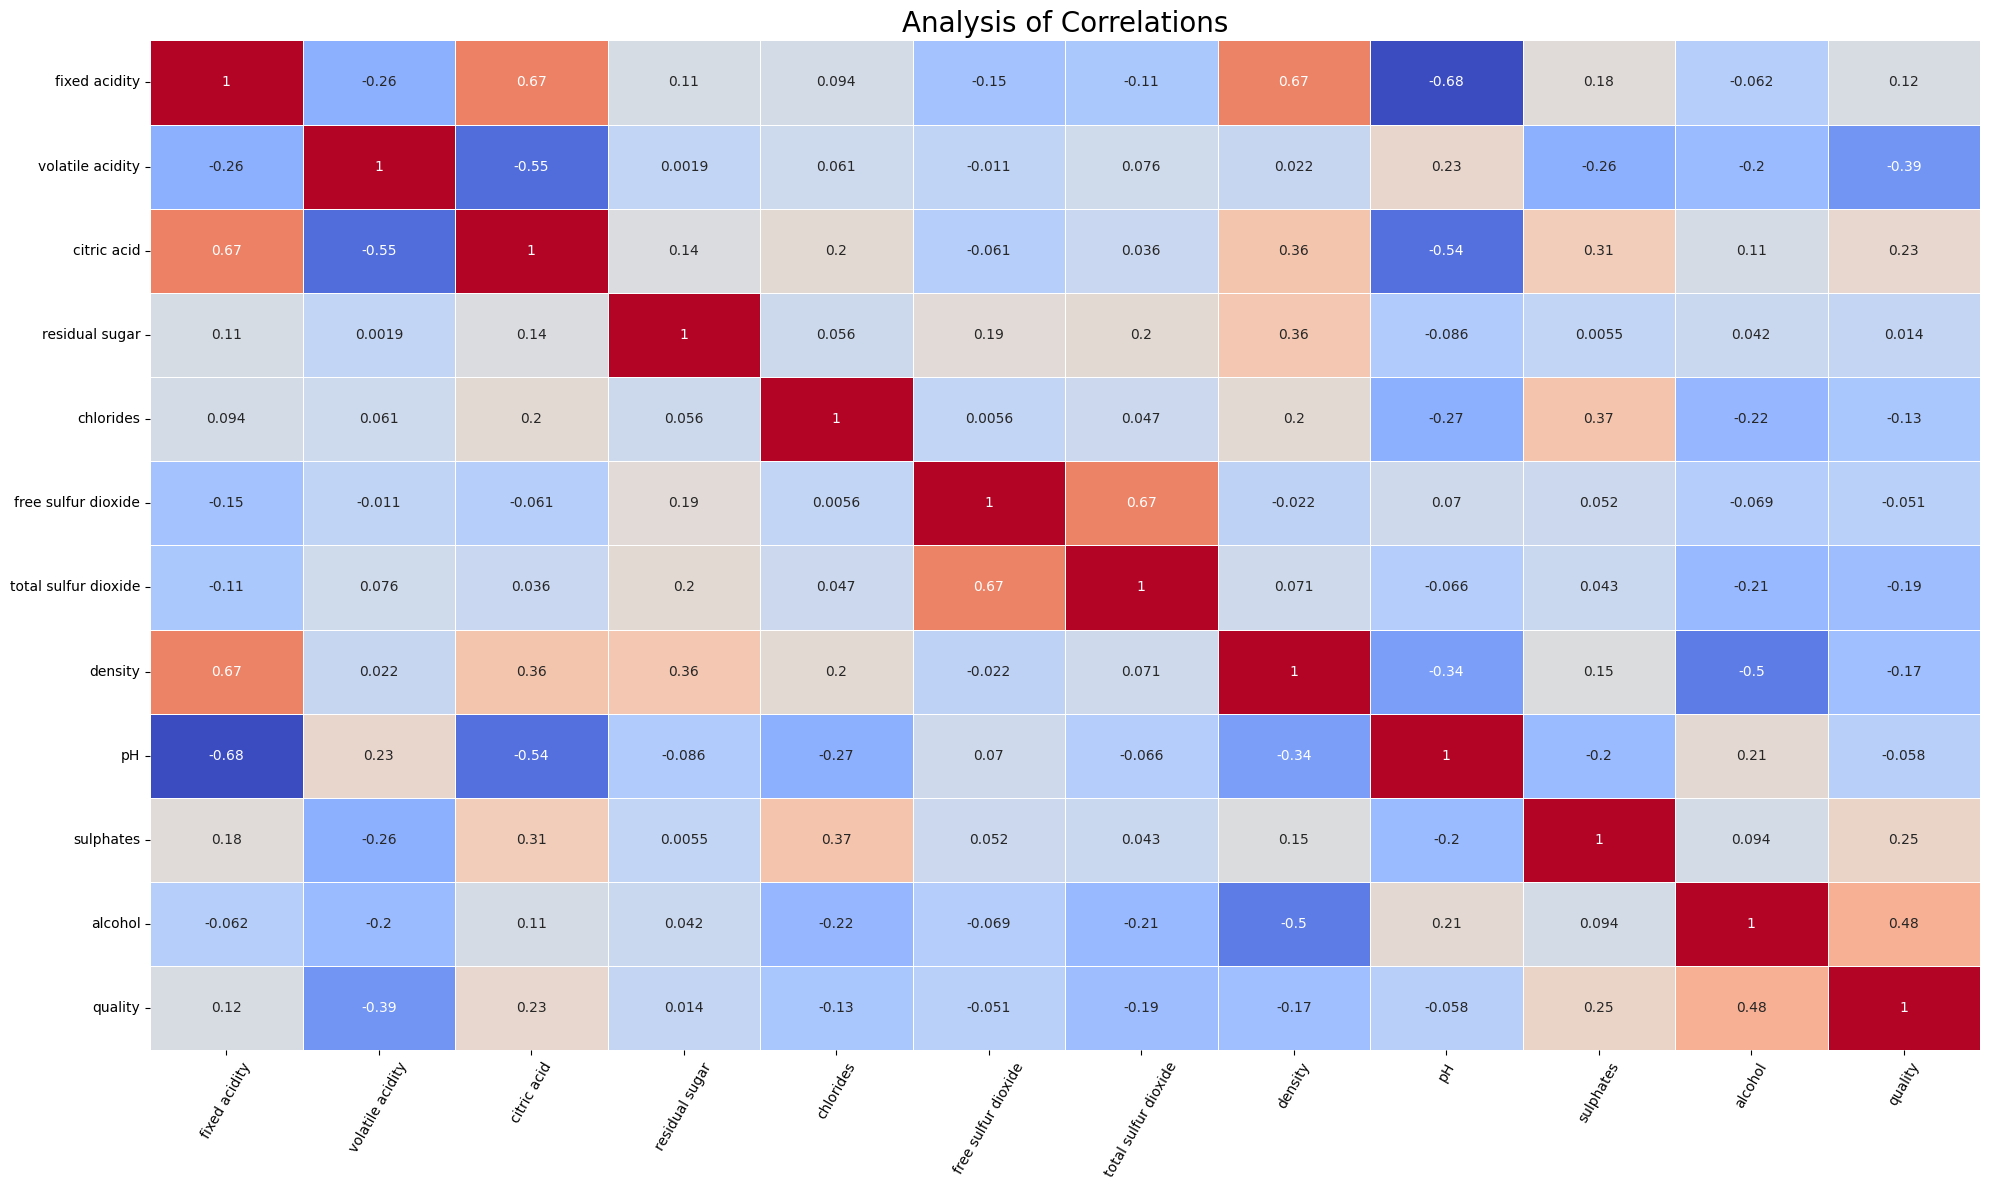

In [57]:
plt.figure(figsize=(20, 12))

sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm", annot=True, linewidths=.6 , cbar = False)

plt.xticks(rotation=60, size=10)

plt.yticks(size=10)

plt.title('Analysis of Correlations', size=20)

plt.tight_layout()

plt.show()

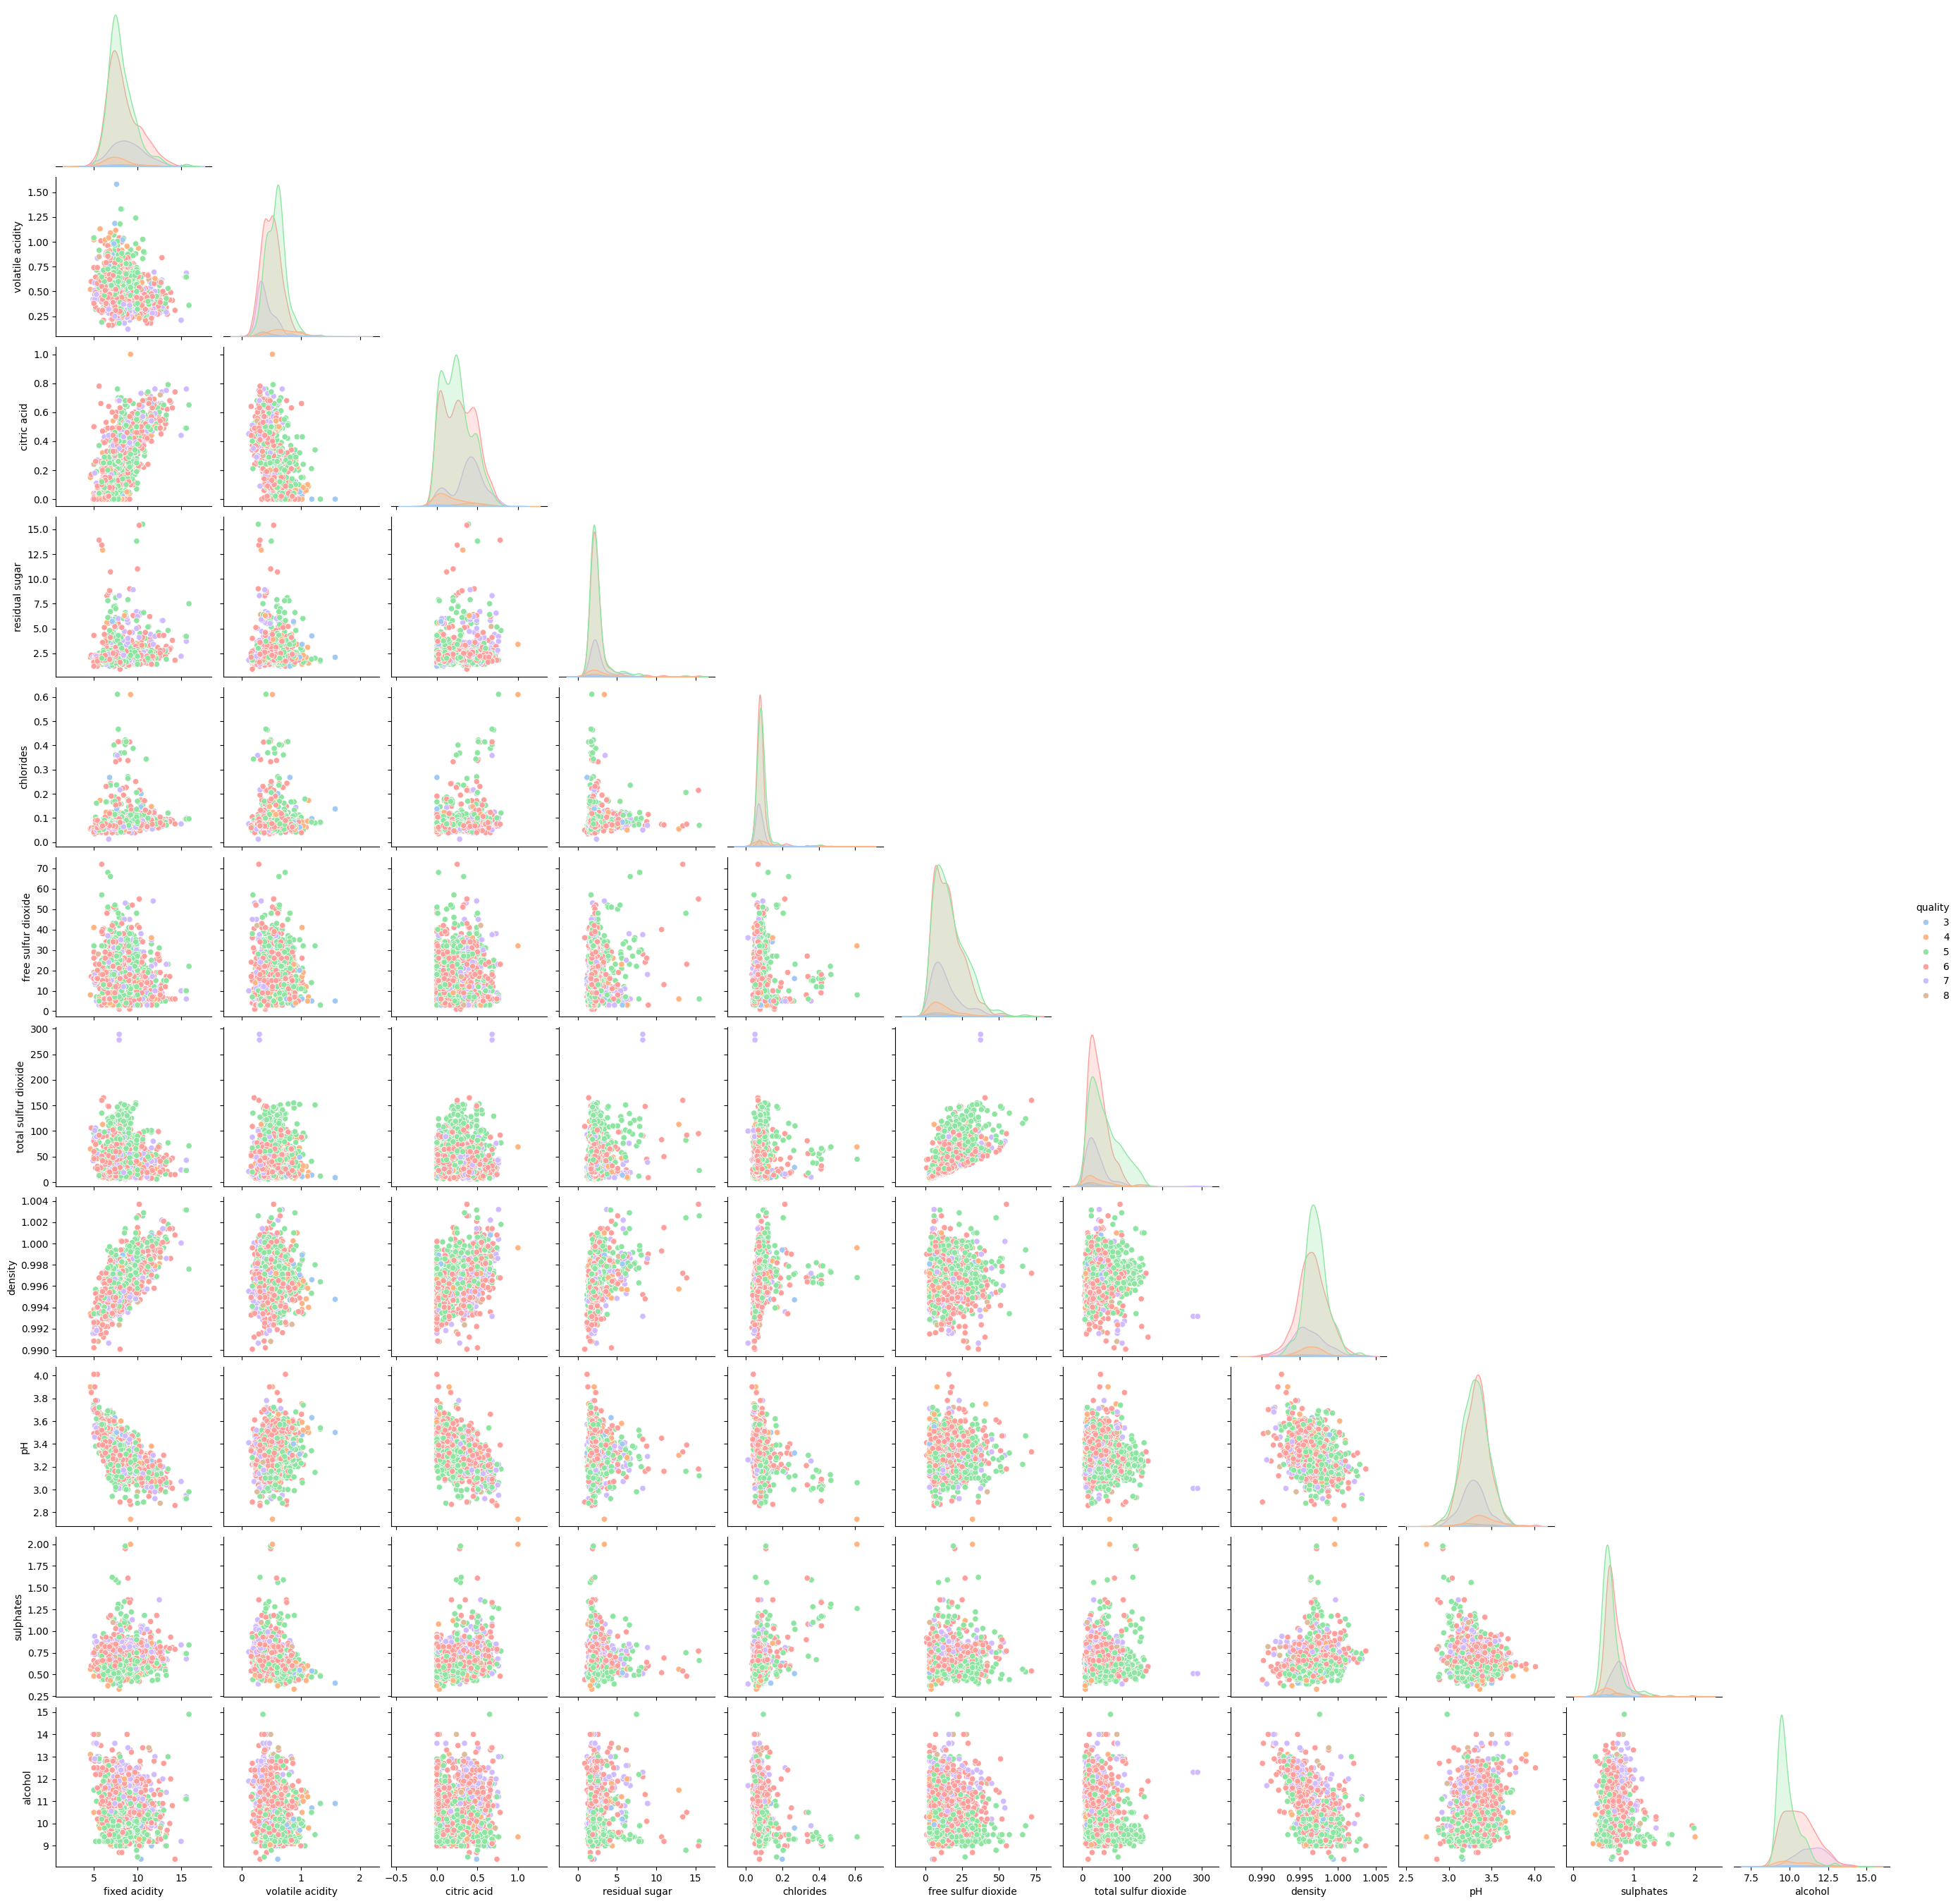

In [42]:
# Membuat plot pasangan (pairplot) untuk visualisasi hubungan antar variabel
sns.pairplot(data=df, diag_kind='kde', hue='quality', palette='pastel',corner=True)
plt.show()

# Preprocessing

In [66]:
#mengganti nilai-nilai dalam kolom 'quality' pada DataFrame 'df' dengan kategori yang lebih deskriptif

data = df.replace({'quality' : {

                                    8 : 'Good',

                                    7 : 'Good',

                                    6 : 'Middle',

                                    5 : 'Middle',

                                    4 : 'Bad',

                                    3 : 'Bad',}})

In [18]:
data['quality'].value_counts()

,count
quality,
Middle,1319
Good,217
Bad,63


In [19]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Middle
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Middle
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Middle
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Middle
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Middle


In [67]:
# Menggunakan LabelEncoder untuk mengubah kategori pada kolom 'quality' menjadi format numerik
labelencoder_y = LabelEncoder()

data['quality'] = labelencoder_y.fit_transform(data['quality'])

In [21]:
train_columns = data.columns[:-1]

train_columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

<ipython-input-35-e6918459519e>:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


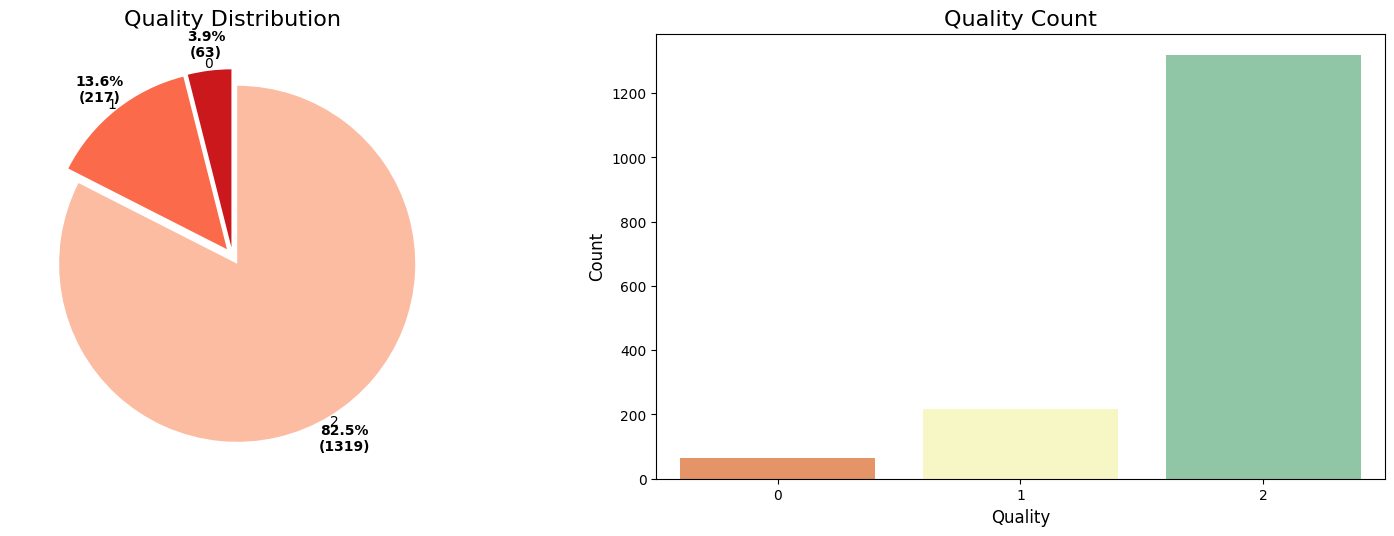

In [35]:
# Fungsi untuk menempatkan label di luar diagram lingkaran

def autopct_outside(pct, values):

    total = sum(values)

    val = int(round(pct * total / 100.0))

    return f'{pct:.1f}%\n({val})'


# Mengatur ukuran figure
plt.figure(figsize=(16, 6))



# Plot pertama - Diagram lingkaran (Pie chart)

plt.subplot(1, 2, 1)

quality_counts = data['quality'].value_counts().sort_index()  # Menghitung jumlah setiap kategori 'quality'
explode = [0.05] * len(quality_counts)  # Sedikit pemisahan untuk semua irisan
# Membuat diagram lingkaran
wedges, texts, autotexts = plt.pie(

    quality_counts,

    labels=quality_counts.index,

    colors=sns.color_palette('Reds_r', len(quality_counts)),

    autopct=lambda pct: autopct_outside(pct, quality_counts),

    startangle=90,

    explode=explode,

    pctdistance=1.15,  # Mengatur posisi label persentase
    labeldistance=1.04  # Mengatur posisi label

)

# Mengatur posisi label

for text in texts:

    text.set_horizontalalignment('center')

for autotext in autotexts:

    autotext.set_color('black')

    autotext.set_fontsize(10)

    autotext.set_weight('bold')



plt.title('Quality Distribution', fontsize=16)



# Plot kedua - Count plot

plt.subplot(1, 2, 2)

sns.countplot(

    data=data,

    x='quality',

    palette='Spectral',

)

plt.title('Quality Count', fontsize=16)

plt.xlabel('Quality', fontsize=12)

plt.ylabel('Count', fontsize=12)



# Perbaikan tata letak umum

plt.tight_layout(pad=3.0)

plt.show()

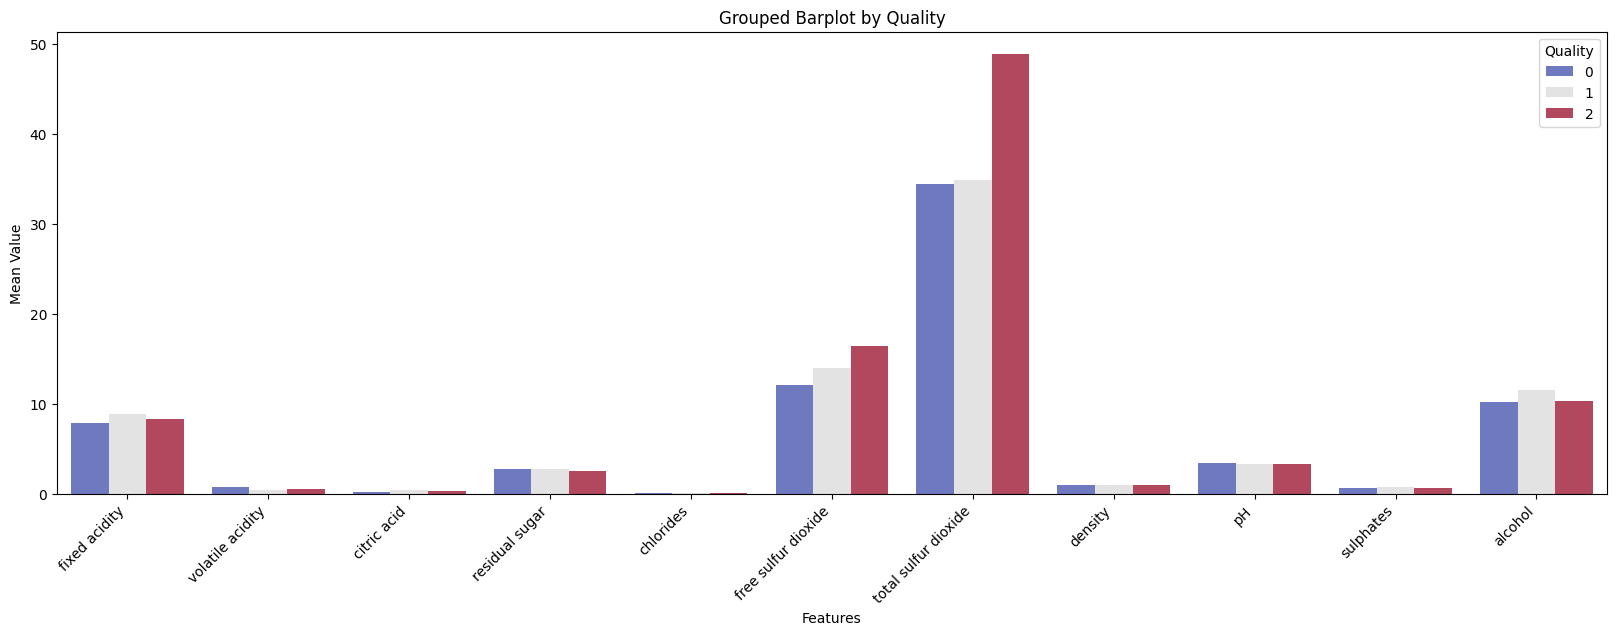

In [60]:
gm = data.groupby('quality').mean()

plt.figure(figsize=(20, 6))

sns.barplot(data=gm.reset_index().melt(id_vars='quality'),

            x='variable', y='value', hue='quality', palette='coolwarm', alpha=0.8)

plt.xlabel('Features')

plt.ylabel('Mean Value')

plt.title('Grouped Barplot by Quality')

plt.xticks(rotation=45, ha='right')

plt.legend(title='Quality')

plt.show()

kita bisa melihat fitur mana yang memiliki nilai rata-rata lebih tinggi atau lebih rendah dalam kategori kualitas tertentu.

In [68]:
# Menghapus kolom 'quality' dari data dan menyimpan fitur-fitur lainnya dalam variabel X
X = data.drop('quality', axis=1).values

# Menyimpan kolom 'quality' dalam variabel y sebagai target
y = data['quality']

# Membagi data menjadi set pelatihan dan set pengujian
# test_size = 0.2 berarti 20% data akan digunakan untuk pengujian
# random_state = 0 untuk memastikan pembagian data yang konsisten
# stratify = y untuk menjaga proporsi kelas dalam set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# Menampilkan bentuk (shape) dari masing-masing set data
print("Shape of X_train: ", X_train.shape)  # Menampilkan ukuran set pelatihan untuk fitur
print("Shape of X_test: ", X_test.shape)    # Menampilkan ukuran set pengujian untuk fitur
print("Shape of y_train: ", y_train.shape)  # Menampilkan ukuran set pelatihan untuk target
print("Shape of y_test: ", y_test.shape)    # Menampilkan ukuran set pengujian untuk target

Shape of X_train:  (1279, 11)
Shape of X_test:  (320, 11)
Shape of y_train:  (1279,)
Shape of y_test:  (320,)


In [69]:
# Mengimpor StandardScaler dari sklearn.preprocessing
sc = StandardScaler()

# Menstandarisasi set pelatihan dengan menghitung rata-rata dan deviasi standar
X_train = sc.fit_transform(X_train)

# Menggunakan parameter yang sama untuk menstandarisasi set pengujian
X_test = sc.transform(X_test)

# Mengubah bentuk y_train dan y_test menjadi vektor satu dimensi
y_train = y_train.ravel()
y_test = y_test.ravel()

<ipython-input-69-c94d7d0829d1>:11: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_train = y_train.ravel()
<ipython-input-69-c94d7d0829d1>:12: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_test = y_test.ravel()


# Modelling (Decision tree)

In [31]:
# Inisialisasi Decision Tree Classifier dengan parameter tertentu
model = DecisionTreeClassifier(
    criterion='entropy',
    splitter='best',
    max_features=6,
    max_depth=20,
    max_leaf_nodes=200,
    random_state=33
)

For Decision Tree Classifier

Training Accuracy: 100.0000 %

Testing Accuracy: 80.3125 %

Classification Report:
               precision    recall  f1-score   support

           0       0.17      0.23      0.19        13
           1       0.51      0.51      0.51        43
           2       0.90      0.88      0.89       264

    accuracy                           0.80       320
   macro avg       0.52      0.54      0.53       320
weighted avg       0.81      0.80      0.81       320



In [32]:
# Latih model dan buat prediksi
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)

# Hitung accuracy scores
acc_model = accuracy_score(y_test, y_pred)
train_acc_model = accuracy_score(y_train, model.predict(X_train))

Model Decision Tree Classifier

Training Accuracy: 100.0000 %

Testing Accuracy: 80.3125 %

Classification Report:
               precision    recall  f1-score   support

           0       0.17      0.23      0.19        13
           1       0.51      0.51      0.51        43
           2       0.90      0.88      0.89       264

    accuracy                           0.80       320
   macro avg       0.52      0.54      0.53       320
weighted avg       0.81      0.80      0.81       320



In [33]:
# Print performance metrics
print('\033[31m' + 'Model Decision Tree Classifier' + '\033[0m\n')
print(f'Training Accuracy: {train_acc_model * 100:.4f} %\n')
print(f'Testing Accuracy: {acc_model * 100:.4f} %\n')

# Print classification report for detailed performance metrics
print("Classification Report:\n", classification_report(y_test, y_pred))

Model Decision Tree Classifier

Training Accuracy: 100.0000 %

Testing Accuracy: 80.3125 %

Classification Report:
               precision    recall  f1-score   support

           0       0.17      0.23      0.19        13
           1       0.51      0.51      0.51        43
           2       0.90      0.88      0.89       264

    accuracy                           0.80       320
   macro avg       0.52      0.54      0.53       320
weighted avg       0.81      0.80      0.81       320



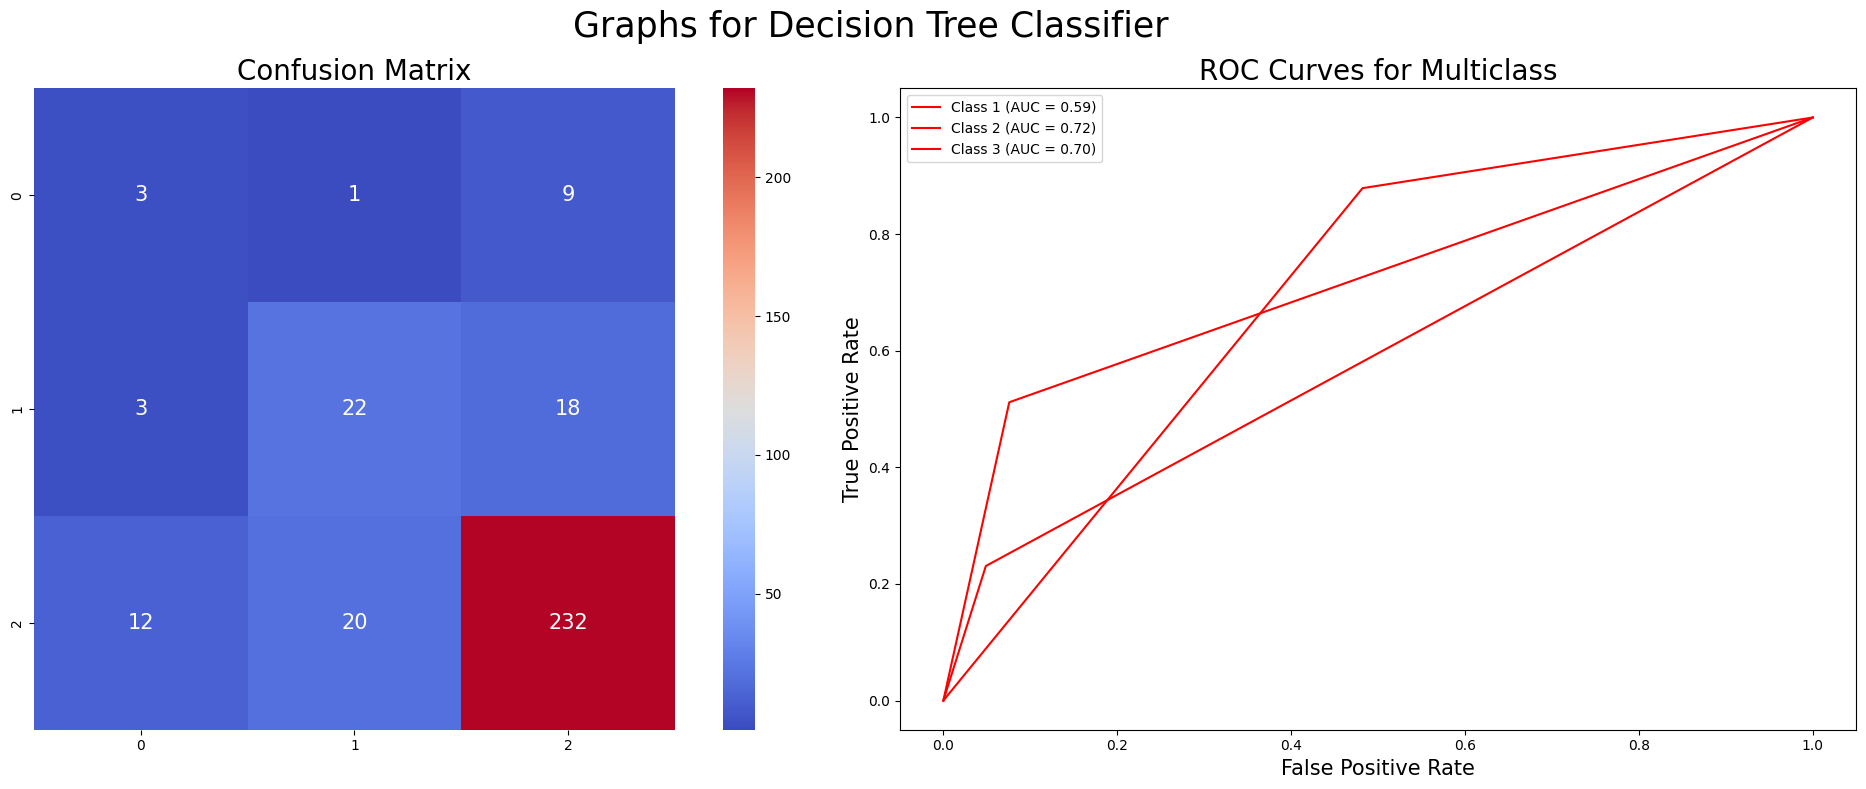

In [59]:
# Membuat subplots untuk matriks kebingungan dan kurva ROC
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
fig.suptitle('Graphs for Decision Tree Classifier', fontsize=25)

# Plot the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True,
            cmap='coolwarm', annot_kws={'size': 15},
            square=True, fmt='.0f', ax=axes[0])
axes[0].set_title('Confusion Matrix', fontsize=20)

# Menggambar kurva ROC untuk multiclass menggunakan strategi one-vs-rest
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)  # Mengubah label pengujian menjadi biner untuk ROC multiclass

for i in range(y_test_bin.shape[1]):  # Melalui setiap kelas
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc = auc(fpr, tpr)
    axes[1].plot(fpr, tpr, label=f'Class {i+1} (AUC = {roc:.2f})', color='red')

axes[1].set_xlabel('False Positive Rate', fontsize=15)
axes[1].set_ylabel('True Positive Rate', fontsize=15)
axes[1].set_title('ROC Curves for Multiclass', fontsize=20)
axes[1].legend()

plt.tight_layout()
plt.show()

Confusion Matrix:
- Sel diagonal (3, 22, dan 232) menunjukkan jumlah sampel yang diklasifikasikan dengan benar, sedangkan sel di luar diagonal menunjukkan kesalahan klasifikasi.
- Model memiliki kinerja yang baik dalam memprediksi kategori "bad" tetapi agak kesulitan dalam memprediksi kategori "good" dan "medium"

Grafik ROC (Receiver Operating Characteristic) di sebelah kanan menunjukkan kinerja classifier pada setiap kelas (Kelas 1, Kelas 2, dan Kelas 3). Setiap kurva mewakili tingkat true positive (positif benar) terhadap tingkat false positive (positif salah) untuk satu kelas, dengan nilai AUC (Area Under the Curve) yang diberikan untuk masing-masing:

Kelas 1 (AUC = 0.59): Nilai AUC yang lebih rendah menunjukkan bahwa kelas ini mungkin lebih sulit untuk dibedakan dengan akurat.
Kelas 2 (AUC = 0.72): Separabilitas sedang, yang menunjukkan kinerja model yang relatif lebih baik untuk kelas ini.
Kelas 3 (AUC = 0.70): Serupa dengan Kelas 2, menunjukkan kinerja model yang sedang untuk kategori ini.

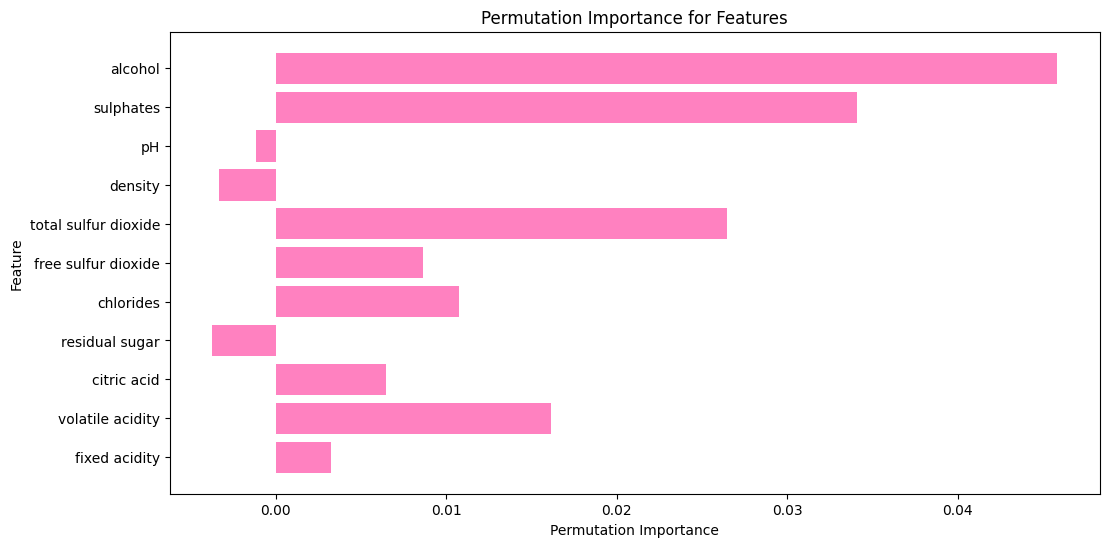

In [28]:
# Calculate and plot permutation importance for feature evaluation
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=30, random_state=42)
feature_importance = perm_importance.importances_mean

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.barh(train_columns, feature_importance, color='#FF81C0')  # Red color for bars
plt.xlabel('Permutation Importance')
plt.ylabel('Feature')
plt.title('Permutation Importance for Features')
plt.show()

5 Fitur yang berperan penting atau mempengaruhi kualitas adalah
1. alcohol
2. sulphates
3. total sulfur dioxide
4. volatile acidity
5. chlorides